In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as data_maker
from sklearn.cluster import DBSCAN

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import confusion_matrix, f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [6]:
data = pd.read_csv("https://raw.githubusercontent.com/GonieAhn/Data-Science-online-course-from-gonie/main/Data%20Store/example_data.csv")

In [7]:
data.head()

censor  event  age    wtkg  hemo  homo  drugs  karnof  oprior  z30  ...  \
0       0   1090   43  66.679     0     1      0     100       0    1  ...   
1       1    794   31  73.030     0     1      0     100       0    1  ...   
2       0    957   41  66.226     0     1      1     100       0    1  ...   
3       1    188   35  78.019     0     1      0     100       0    1  ...   
4       1    308   40  83.009     0     1      0     100       0    1  ...   

   gender  str2  strat  symptom  cd40  cd420  cd496  r  cd80  cd820  
0       1     1      3        0   504    353    660  1   870    782  
1       1     1      3        0   244    225    106  1   708    699  
2       1     1      3        0   401    366    453  1   889    720  
3       1     1      3        0   221    132     -1  0   221    759  
4       1     1      3        1   150     90     20  1  1730   1160  

[5 rows x 23 columns]

In [8]:
Y = data['censor']
X = data.drop(columns=['censor'])

In [9]:
data.columns

Index(['censor', 'event', 'age', 'wtkg', 'hemo', 'homo', 'drugs', 'karnof',
       'oprior', 'z30', 'zprior', 'preanti', 'race', 'gender', 'str2', 'strat',
       'symptom', 'cd40', 'cd420', 'cd496', 'r', 'cd80', 'cd820'],
      dtype='object')

In [10]:
data['cd820'].unique()

array([ 782,  699,  720,  759, 1160,  990, 1000, 2265, 1698, 1017,  710,
       1780,  490, 1220, 1590, 1020,  420,  690,  850,  640, 1034,  590,
        847, 1191, 1287, 1070, 1143, 1125,  784, 1573,  799, 1415, 1338,
        440,  943,  967, 1909, 1905, 1282, 1131,  749,  611, 1558, 1488,
        823,  765,  528,  642, 1170,  545,  816, 1186,  449,  454,  460,
        786,  678, 1295,  612,  958, 1654, 1109, 2056,  920,  813,  945,
       1437,  602, 1482, 1054, 1126, 1176,  776,  567,  748,  950,  622,
        346,  740, 1313,  500, 1491,  858,  585, 1442,  353,  664,  391,
        637,  570,  673, 1140,  828, 1084, 1093, 1290,  566,  954, 1686,
       1406, 1375,  416, 1351, 1831,  936,  513,  739, 1179,  889,  938,
        846,  728,  792,  737,  627,  756, 1280,  583,  432, 1496, 1544,
       1197,  468,  741,  812,  603,  873,  867,  708, 1048,  396,  369,
        886,  621,  779, 1041,  318, 1007, 1162, 1130,  560, 1318, 1018,
        669,  899,  613, 1296, 1418, 1700,  620,  6

<Axes: >

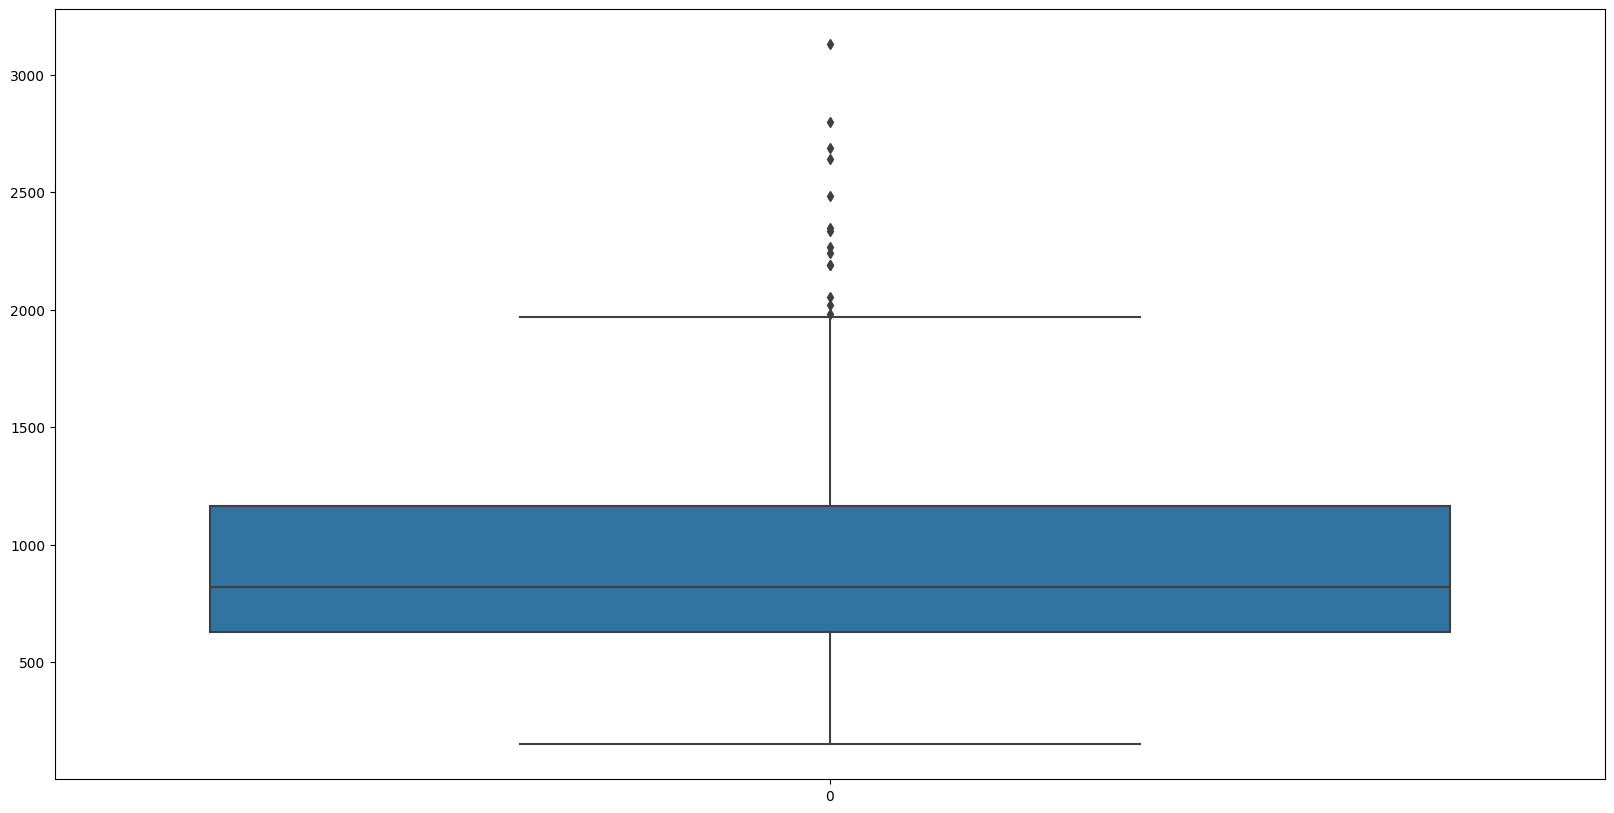

In [11]:
plt.figure(figsize=(20,10))
sns.boxplot(data['cd820'])

In [12]:
data['cd80'][data['cd80'].argsort()[::-1]]

480    4255
444    3190
515    3046
481    2840
356    2739
       ... 
256     337
506     333
516     324
488     225
3       221
Name: cd80, Length: 532, dtype: int64

In [13]:
data = data.drop(index=data['cd80'][data['cd80'].argsort()[::-1]][0:1].index)

In [14]:
data = data.drop(columns=['zprior', 'drugs'],)

In [15]:
data.reset_index(drop=True, inplace=True)

In [16]:
data

censor  event  age     wtkg  hemo  homo  karnof  oprior  z30  preanti  \
0         0   1090   43   66.679     0     1     100       0    1     1352   
1         1    794   31   73.030     0     1     100       0    1      930   
2         0    957   41   66.226     0     1     100       0    1     1329   
3         1    188   35   78.019     0     1     100       0    1      964   
4         1    308   40   83.009     0     1     100       0    1      974   
..      ...    ...  ...      ...   ...   ...     ...     ...  ...      ...   
526       0   1097   24   71.000     1     0     100       0    1      334   
527       1    154   21   52.300     1     0      90       0    1       24   
528       1    588   16   63.000     1     0     100       0    1      753   
529       0    395   17  102.967     1     0     100       0    1      417   
530       1    465   14   60.000     1     0     100       0    0        0   

     ...  gender  str2  strat  symptom  cd40  cd420  cd496  r  cd80  cd820  
0    ...       1     1      3        0   504    353    660  1   870    782  
1    ...       1     1      3        0   244    225    106  1   708    699  
2    ...       1     1      3        0   401    366    453  1   889    720  
3    ...       1     1      3        0   221    132     -1  0   221    759  
4    ...       1     1      3        1   150     90     20  1  1730   1160  
..   ...     ...   ...    ...      ...   ...    ...    ... ..   ...    ...  
526  ...       1     1      2        0   364    475    734  1   770    802  
527  ...       1     1      2        0   415    181     84  1   949    666  
528  ...       1     1      3        0   299    214    124  1   546    471  
529  ...       1     1      3        0   373    218     -1  0  1759   1030  
530  ...       1     0      1        0   166    169     28  1   999   1838  

[531 rows x 21 columns]

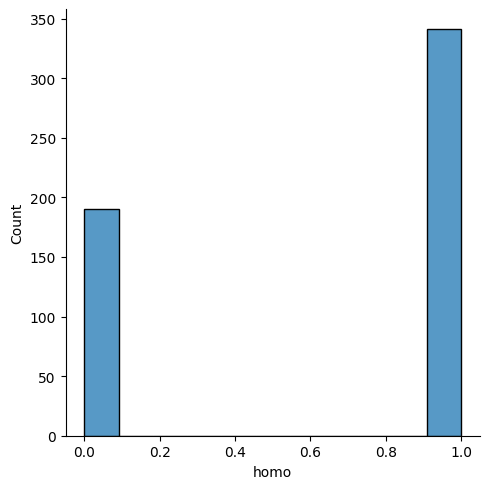

In [17]:
sns.displot(data['homo'])

In [18]:
Y = data['censor']
X = data.drop(columns=['censor'])

In [22]:
pca = PCA(n_components=2).fit(X)
X_PCA = pca.fit_transform(X)
X_EMM = pd.DataFrame(X_PCA, columns=['AXIS1','AXIS2'])
print(">>>> PCA Variance : {}".format(pca.explained_variance_ratio_))

>>>> PCA Variance : [0.44407949 0.27476111]


In [23]:
X_EMM

AXIS1       AXIS2
0   -100.721601  954.147806
1   -309.658091  590.610418
2   -127.983872  948.063379
3   -601.597076  687.133792
4    760.864896  587.604545
..          ...         ...
526 -248.983252  -59.973003
527 -209.304782 -281.430423
528 -589.244854  450.718700
529  652.507945   28.091299
530  602.961911 -404.854183

[531 rows x 2 columns]

epsilon : 1, minPls : 5


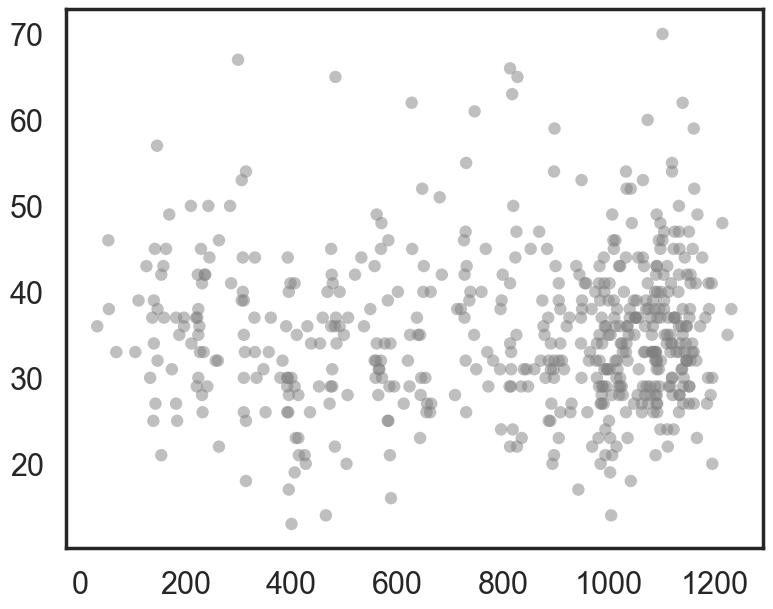

epsilon : 1, minPls : 10


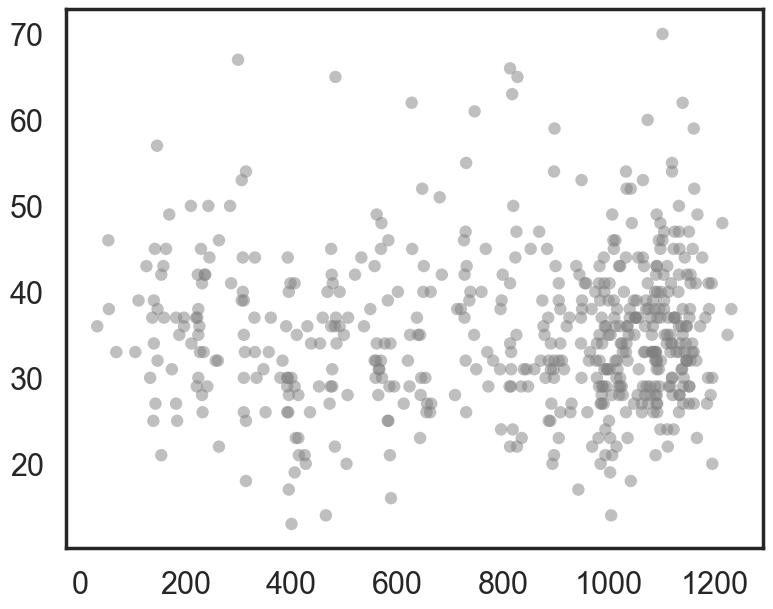

epsilon : 1, minPls : 15


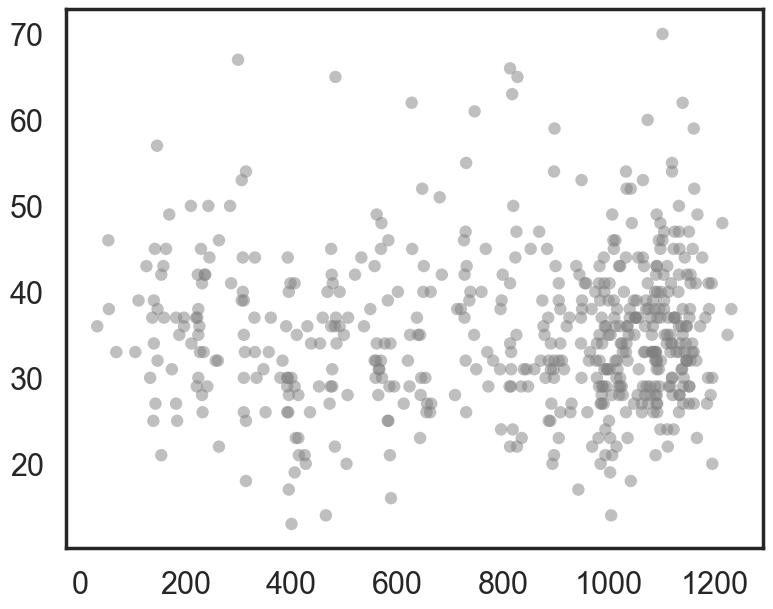

epsilon : 1, minPls : 20


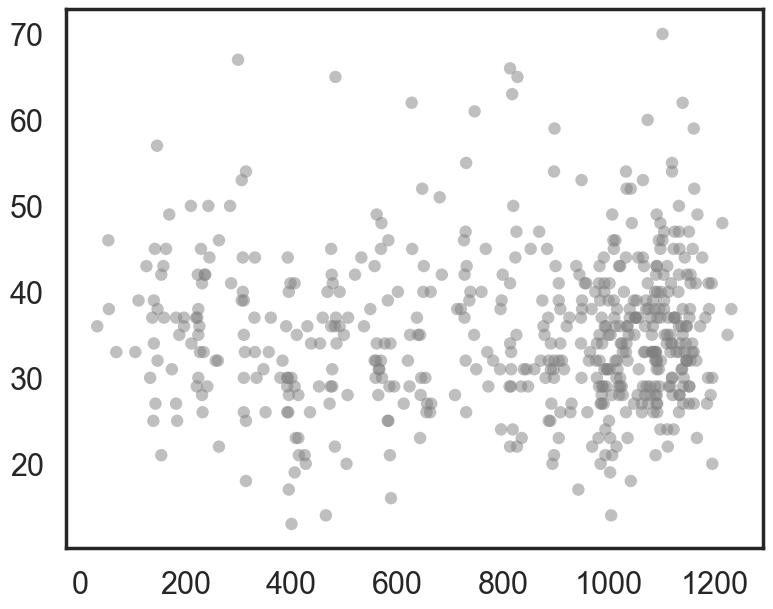

epsilon : 2, minPls : 5


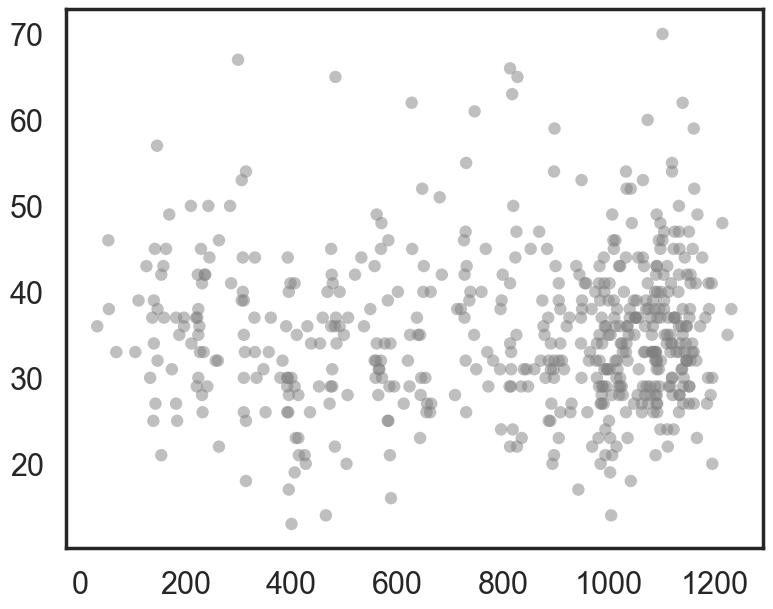

epsilon : 2, minPls : 10


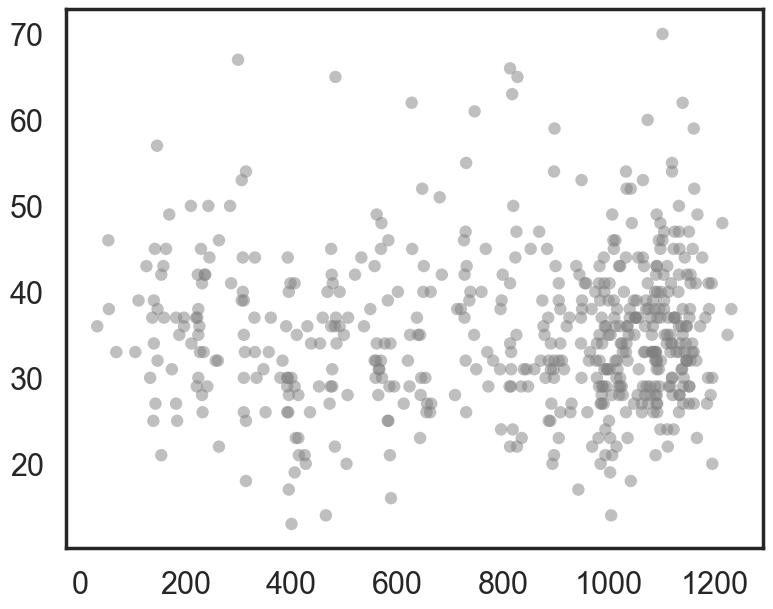

epsilon : 2, minPls : 15


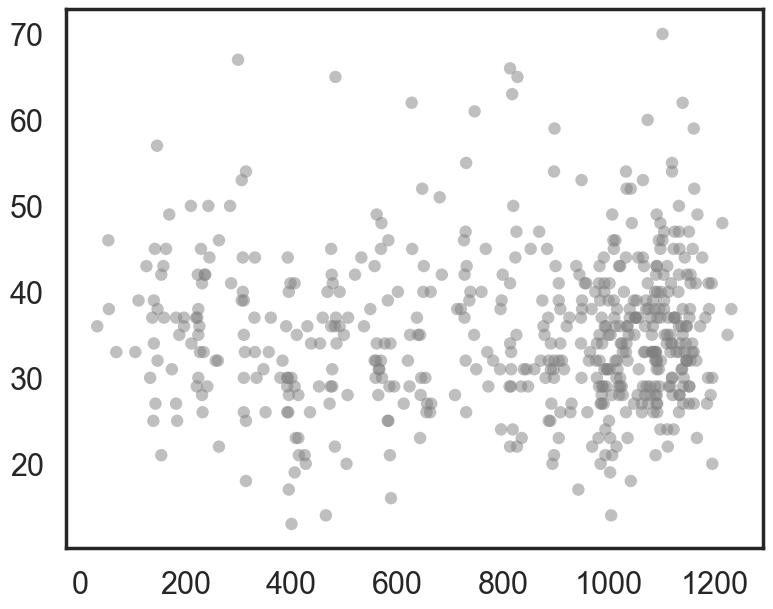

epsilon : 2, minPls : 20


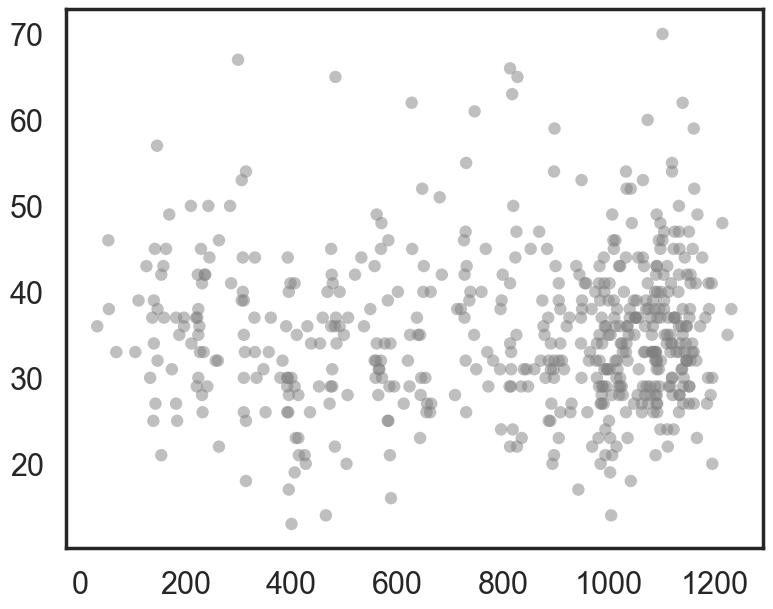

epsilon : 3, minPls : 5


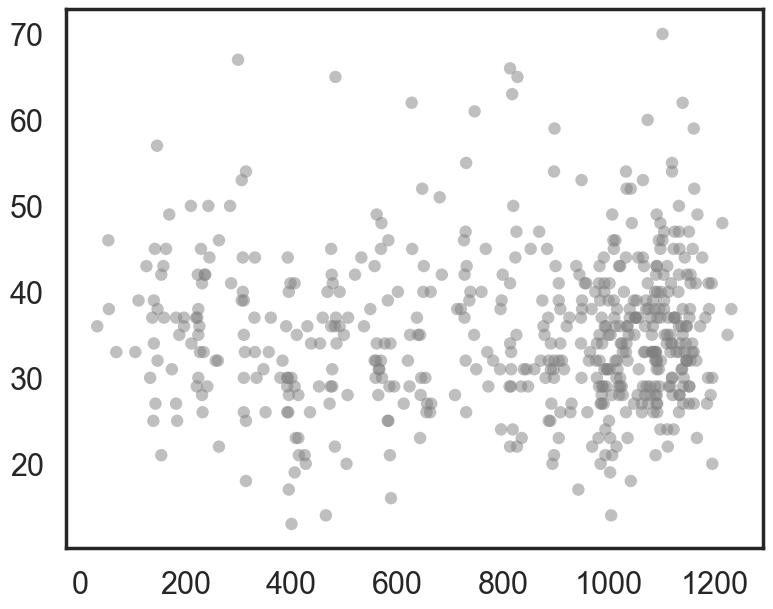

epsilon : 3, minPls : 10


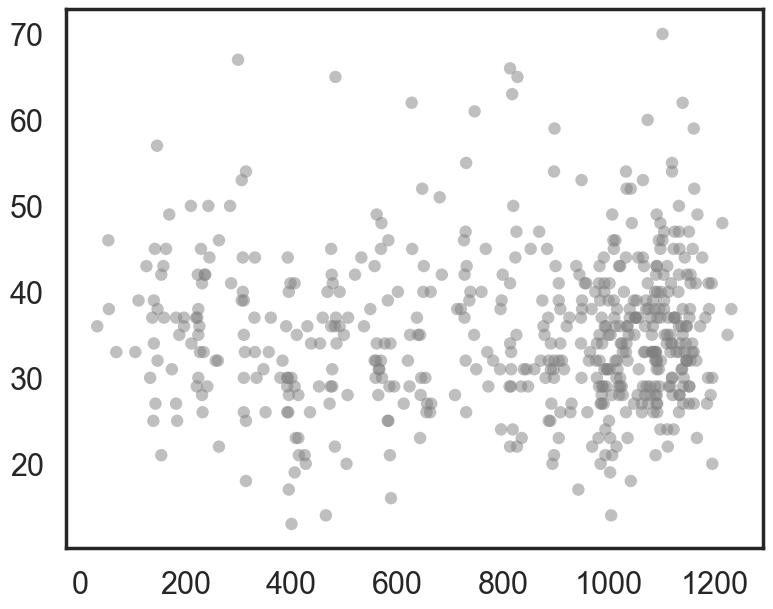

epsilon : 3, minPls : 15


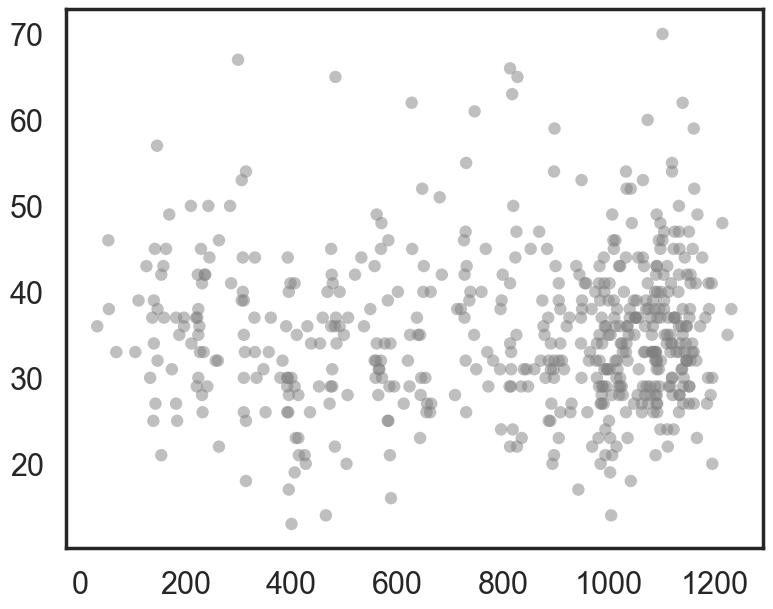

epsilon : 3, minPls : 20


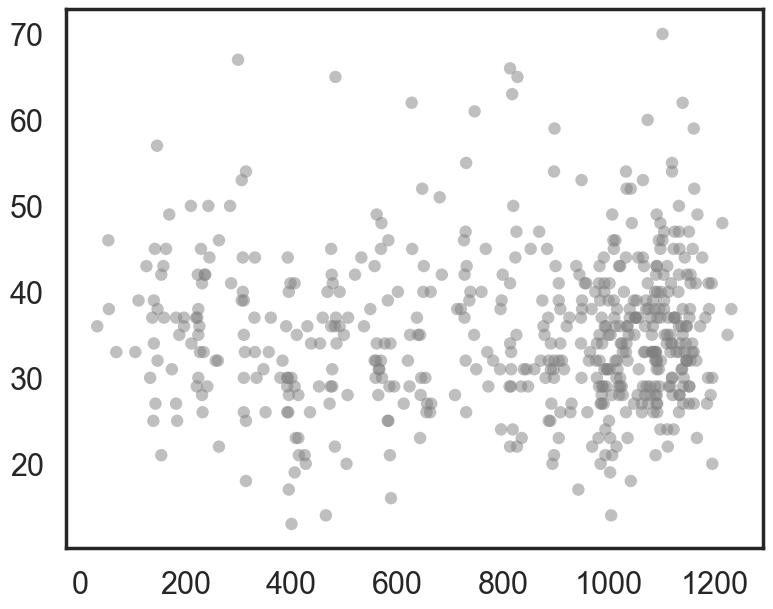

epsilon : 4, minPls : 5


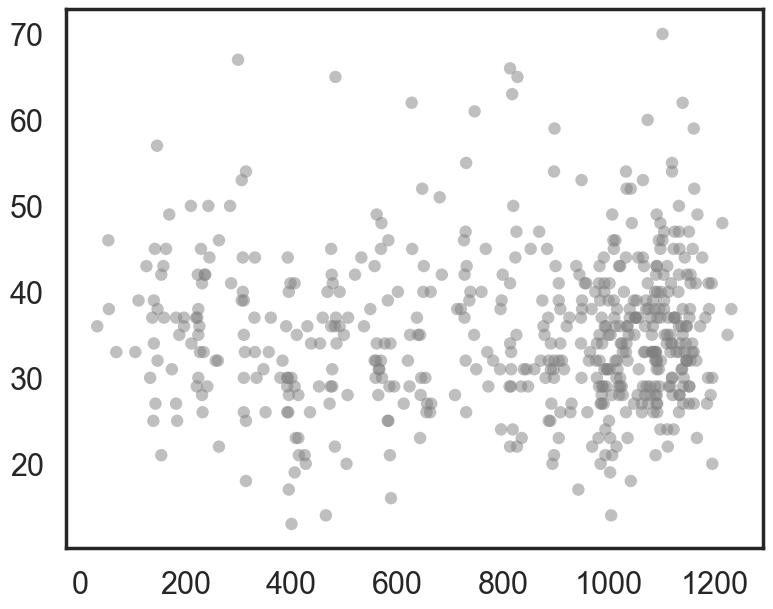

epsilon : 4, minPls : 10


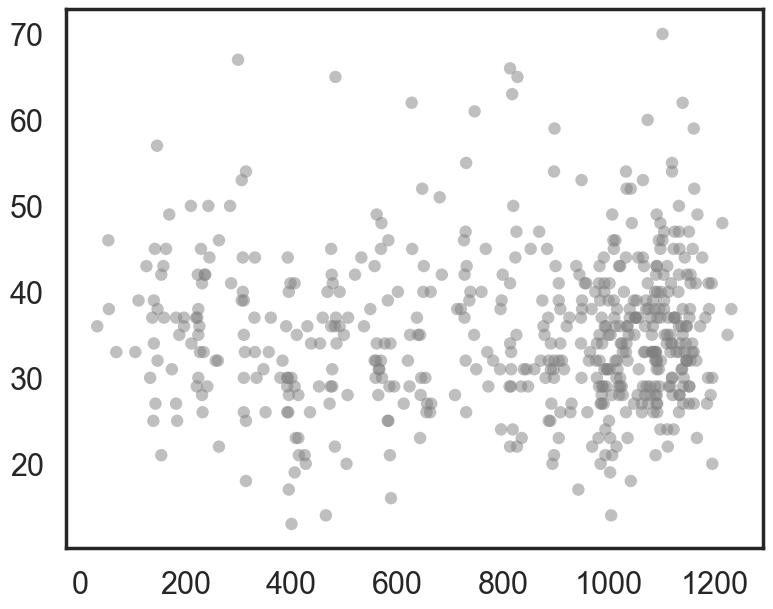

epsilon : 4, minPls : 15


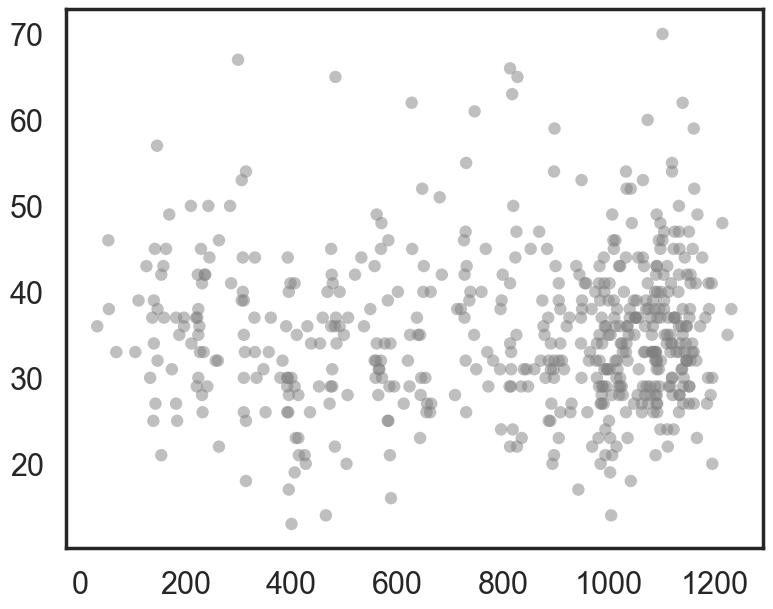

epsilon : 4, minPls : 20


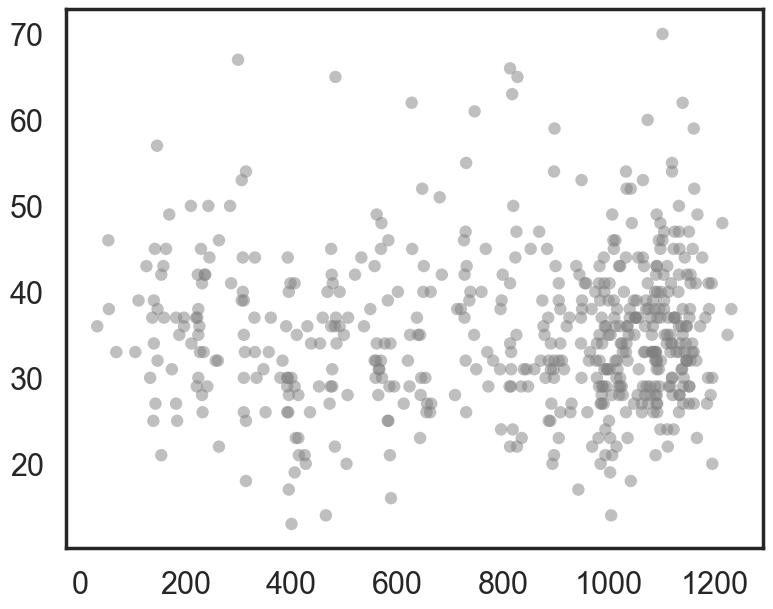

epsilon : 5, minPls : 5


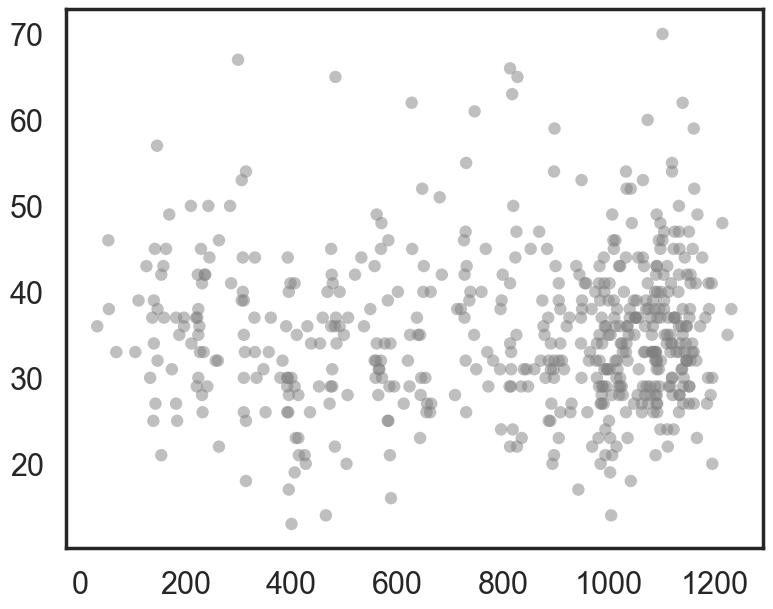

epsilon : 5, minPls : 10


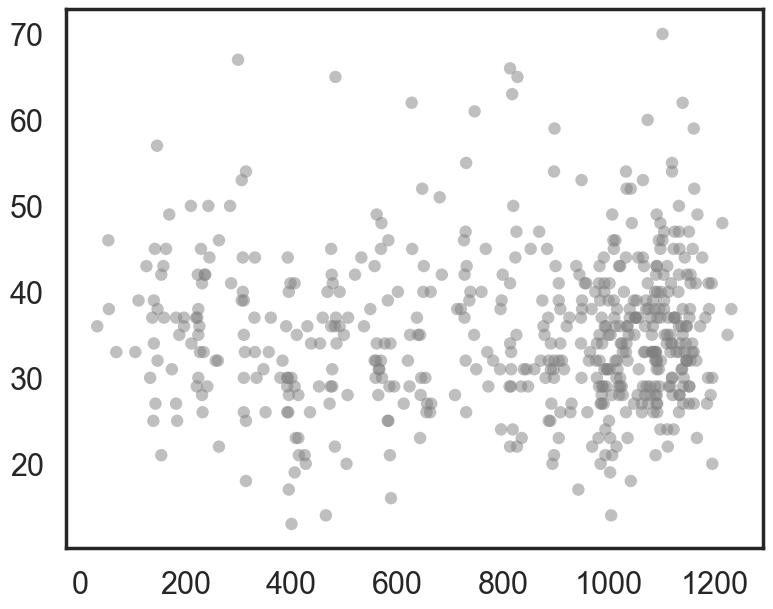

epsilon : 5, minPls : 15


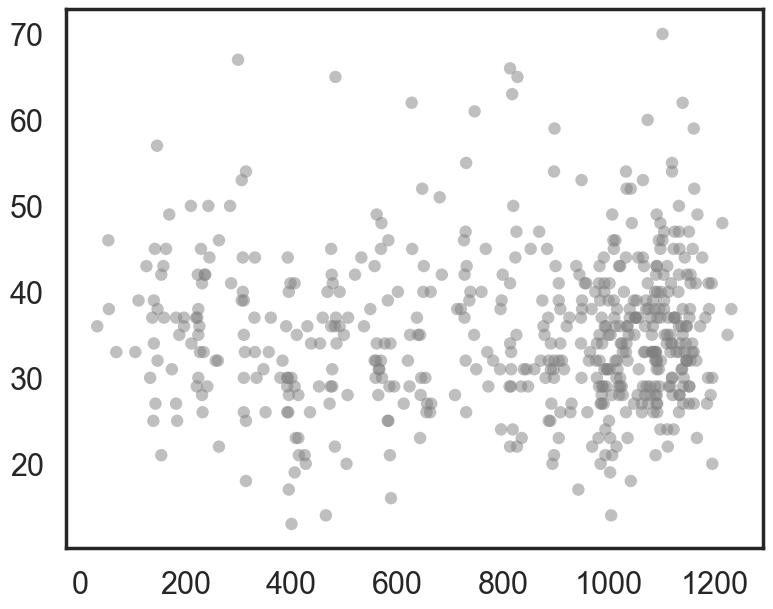

epsilon : 5, minPls : 20


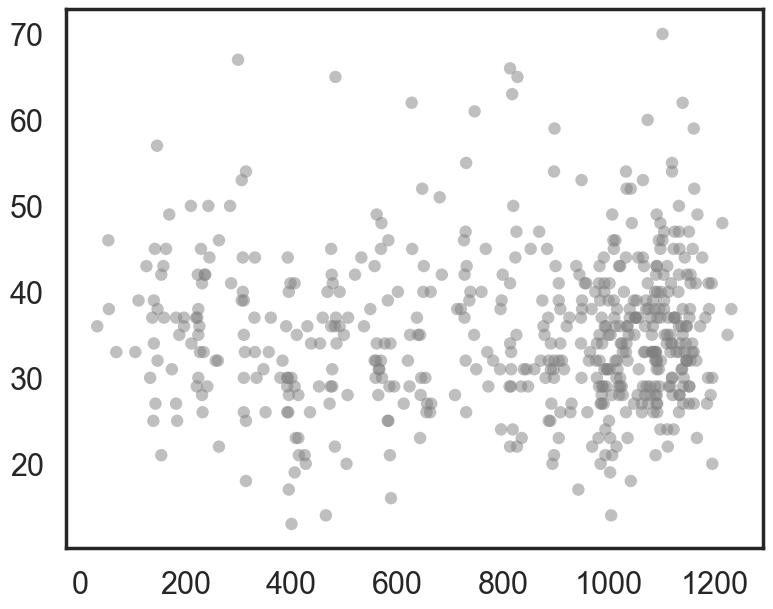

epsilon : 6, minPls : 5


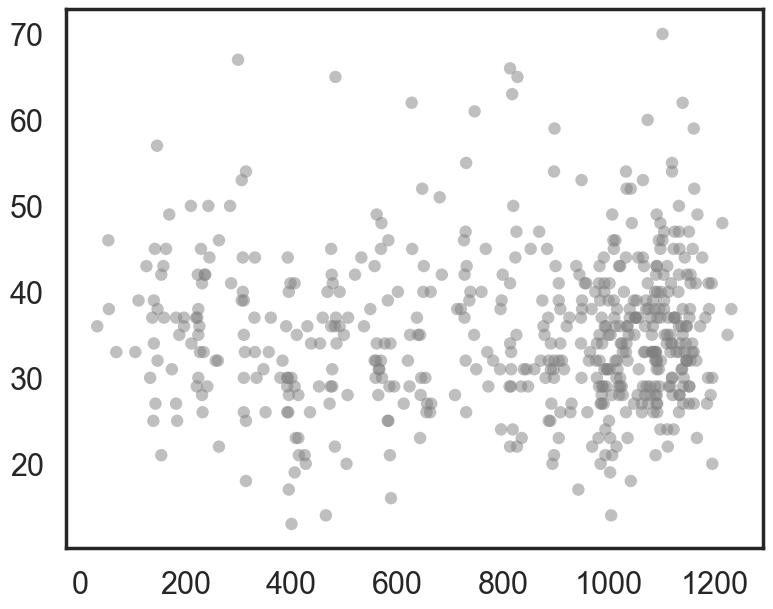

epsilon : 6, minPls : 10


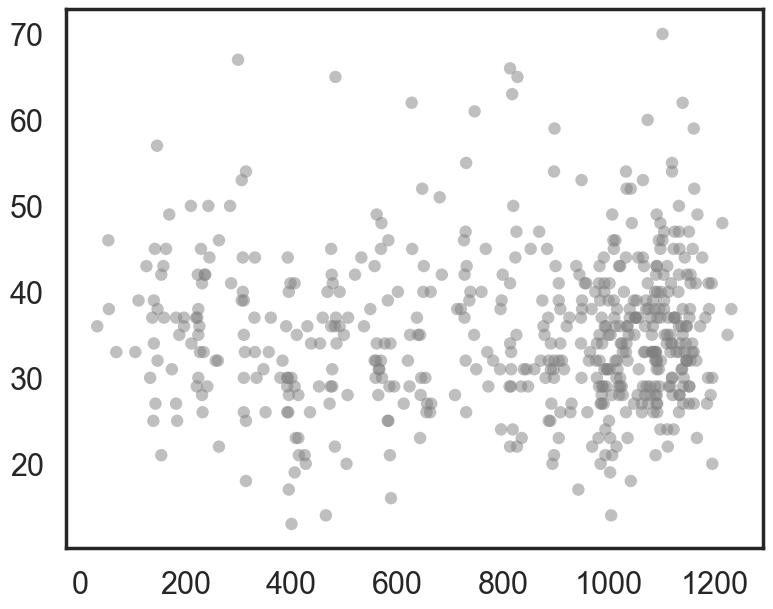

epsilon : 6, minPls : 15


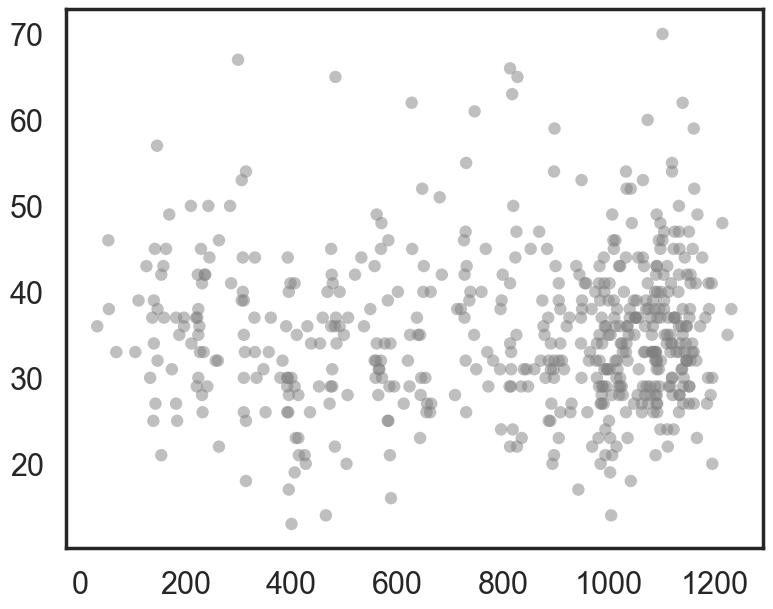

epsilon : 6, minPls : 20


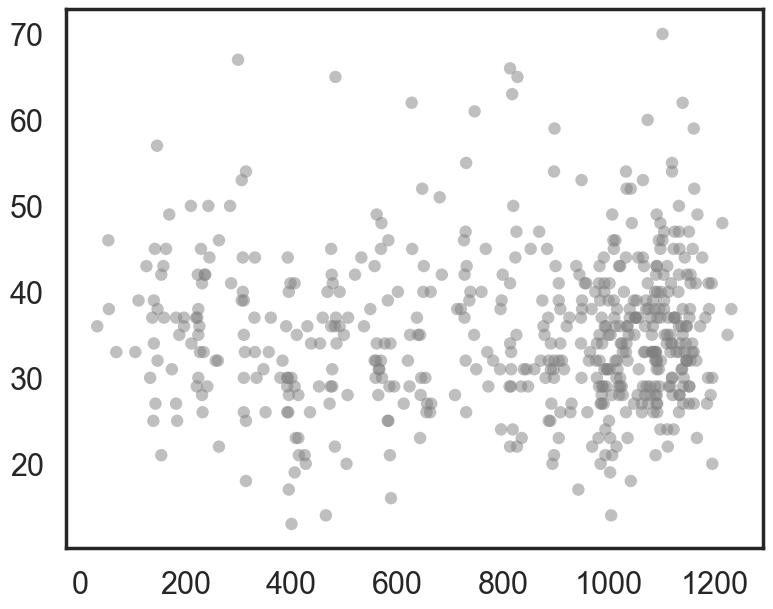

epsilon : 500, minPls : 5


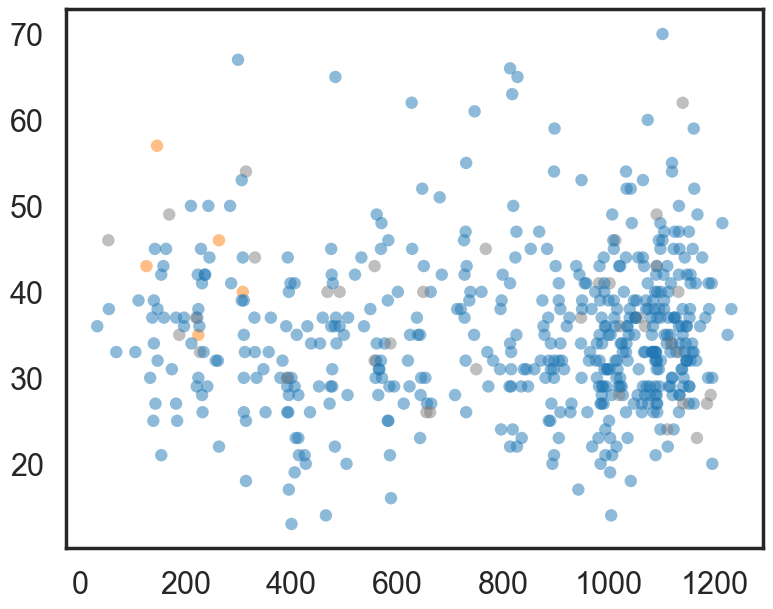

epsilon : 500, minPls : 10


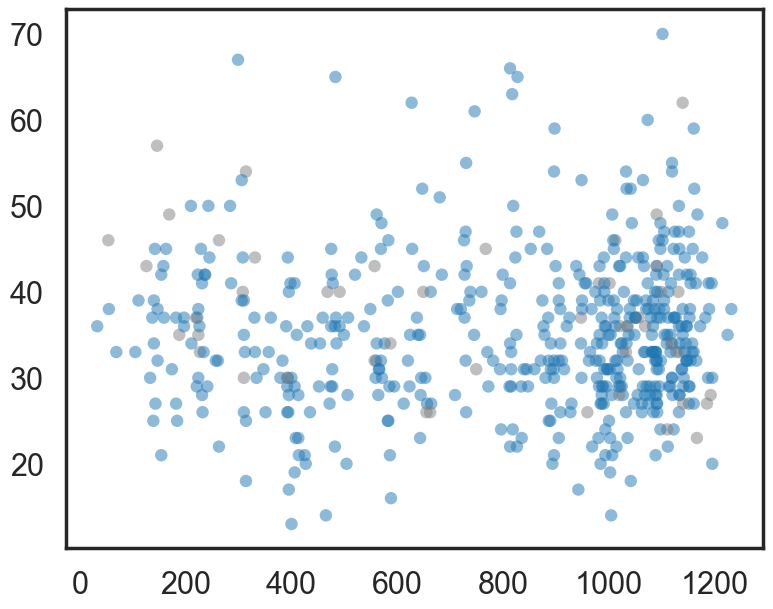

epsilon : 500, minPls : 15


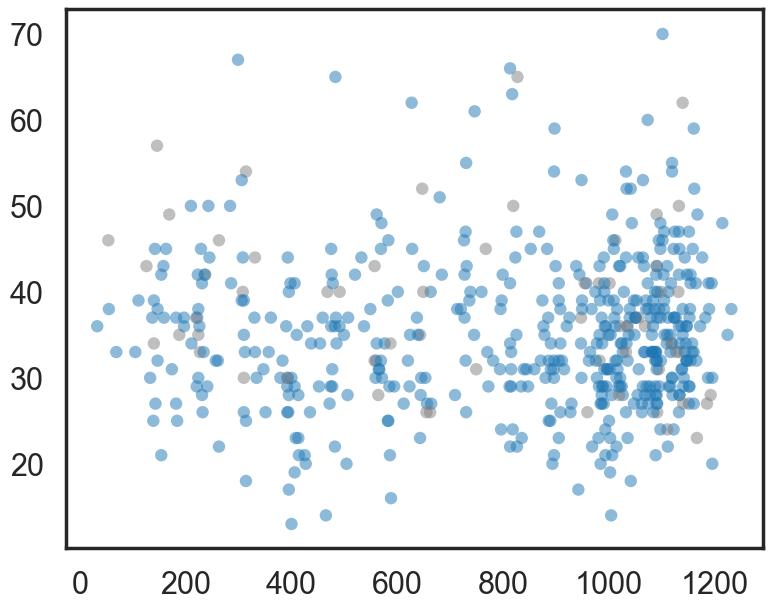

epsilon : 500, minPls : 20


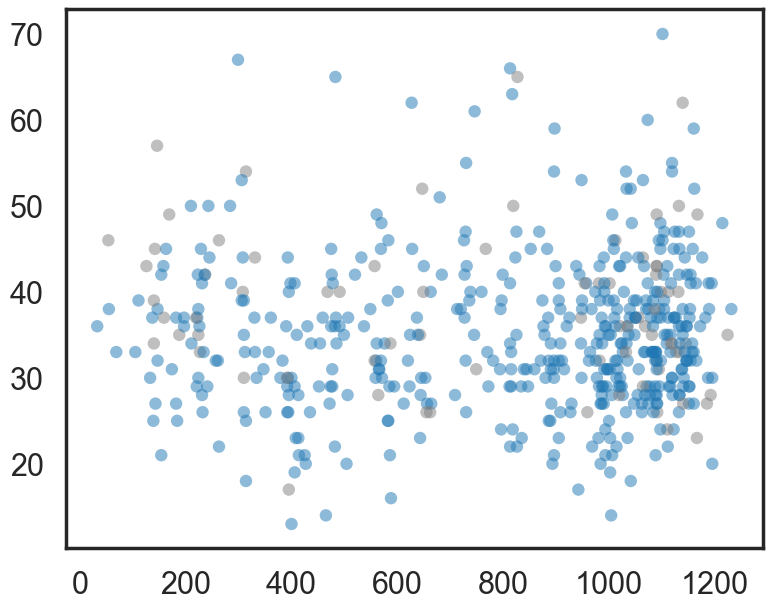

epsilon : 1000, minPls : 5


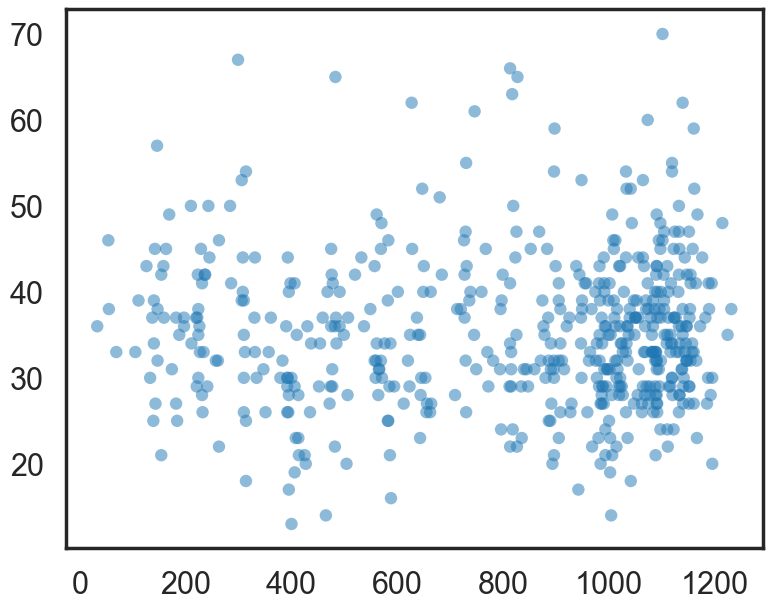

epsilon : 1000, minPls : 10


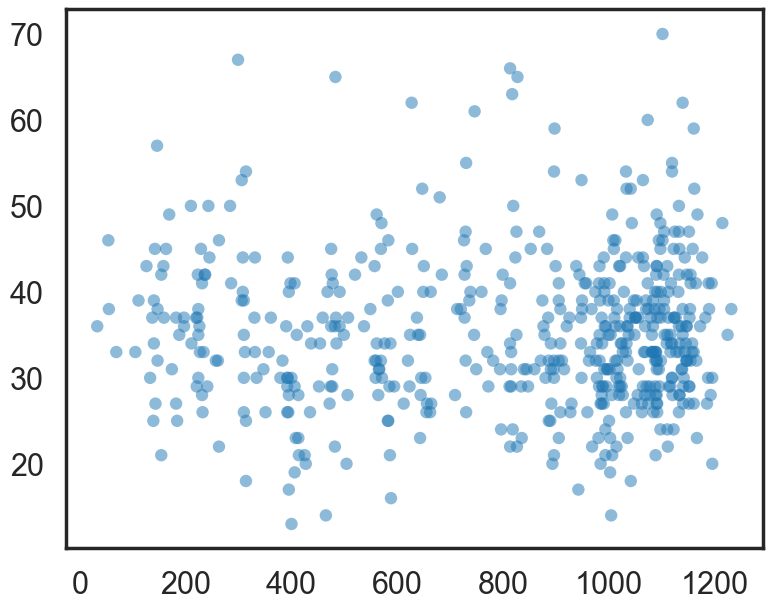

epsilon : 1000, minPls : 15


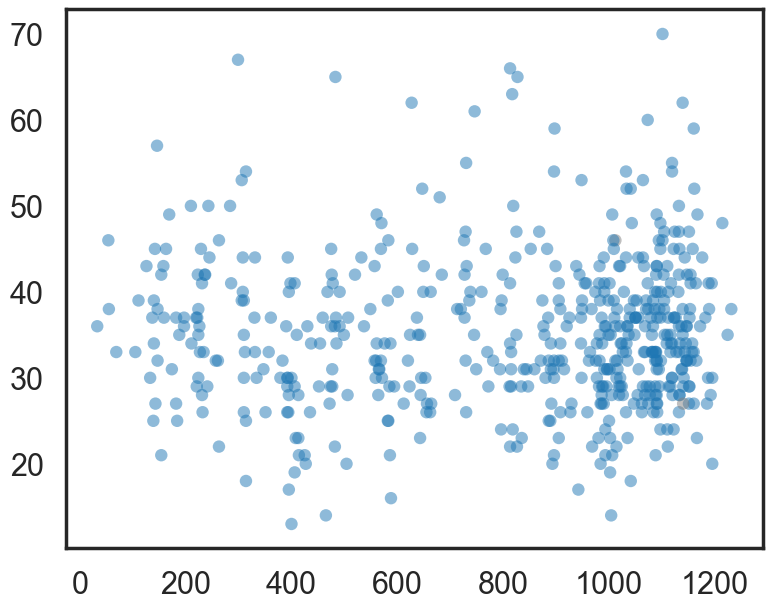

epsilon : 1000, minPls : 20


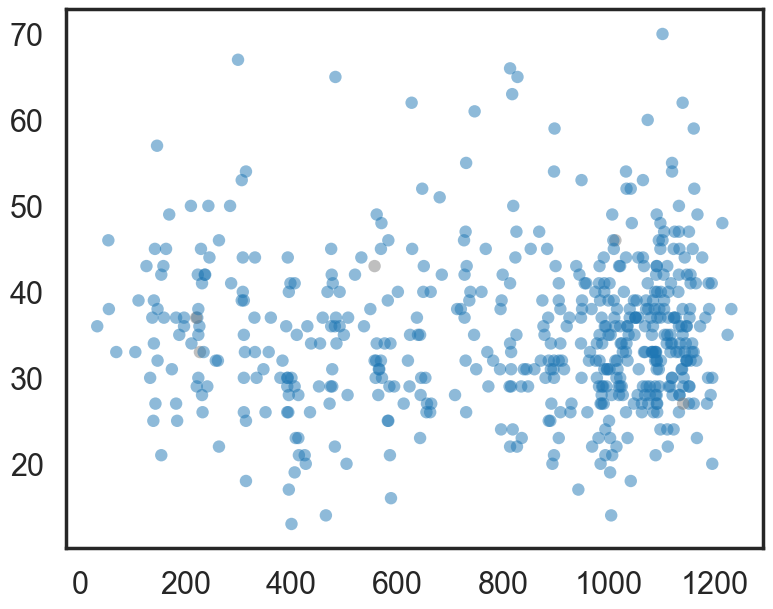

In [34]:
epsilon = [1, 2, 3, 4, 5, 6, 500, 1000]
minPls = [5, 10, 15, 20]

for e in epsilon:
    for m in minPls:
        print("epsilon : {}, minPls : {}".format(e, m))
        db = DBSCAN(eps=e, min_samples=m).fit(X)
        palette = sns.color_palette()
        cluster_colors = [palette[col]
                        if col >= 0 else (0.5, 0.5, 0.5) for col in
                        db.labels_]
        plt.scatter(X.iloc[:,0], X.iloc[:,1], c=cluster_colors, **plot_kwds)
        plt.show()

In [25]:
cm = confusion_matrix(data['censor'], db.labels_)
print(cm)

[[185 166]
 [122  58]]


In [26]:
print("TesT Acc : {}".format((cm[0,0] + cm[1,1])/cm.sum()))
print("F1-Score : {}".format(f1_score(data['censor'], db.labels_)))

TesT Acc : 0.4576271186440678
F1-Score : 0.28712871287128716


In [21]:
#plt 와 sns Setting
%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}
plt.rcParams["figure.figsize"] = [9,7]

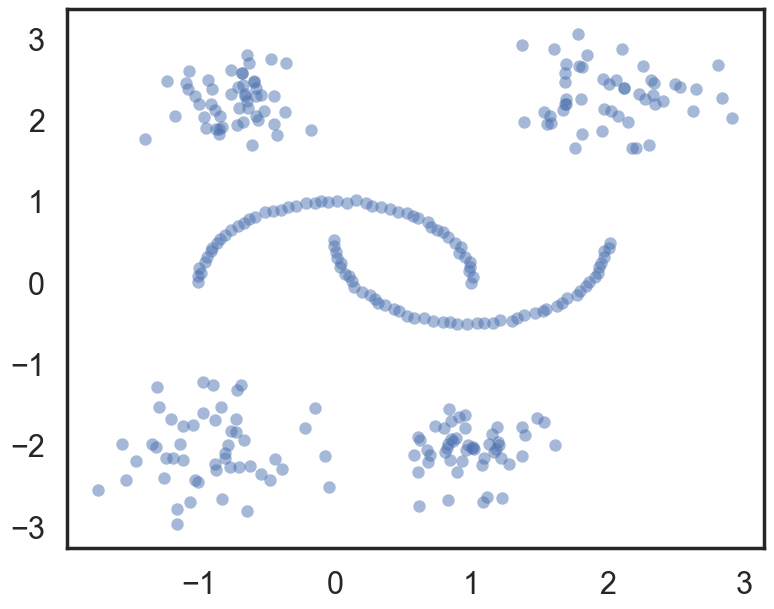

In [22]:
num=100
moons, _ = data_maker.make_moons(n_samples=num, noise=0.01)
blobs, _ = data_maker.make_blobs(n_samples=num, centers=[(-0.75,2.25), (1.0, -2.0)], cluster_std=0.25)
blobs2, _ = data_maker.make_blobs(n_samples=num, centers=[(2,2.25), (-1, -2.0)], cluster_std=0.4)
test_data = np.vstack([moons, blobs,blobs2])
plt.scatter(test_data.T[0], test_data.T[1], color='b', **plot_kwds)
plt.show()

epsilon : 0.1, minPls : 5


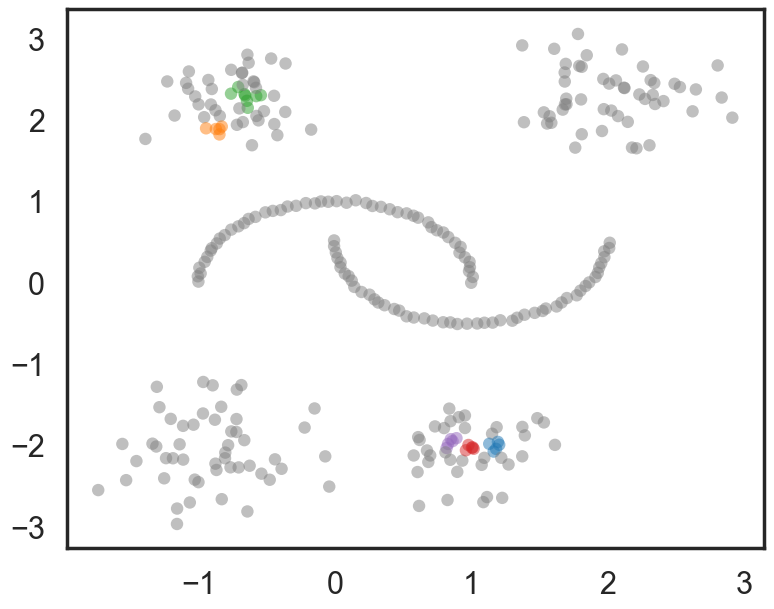

epsilon : 0.1, minPls : 10


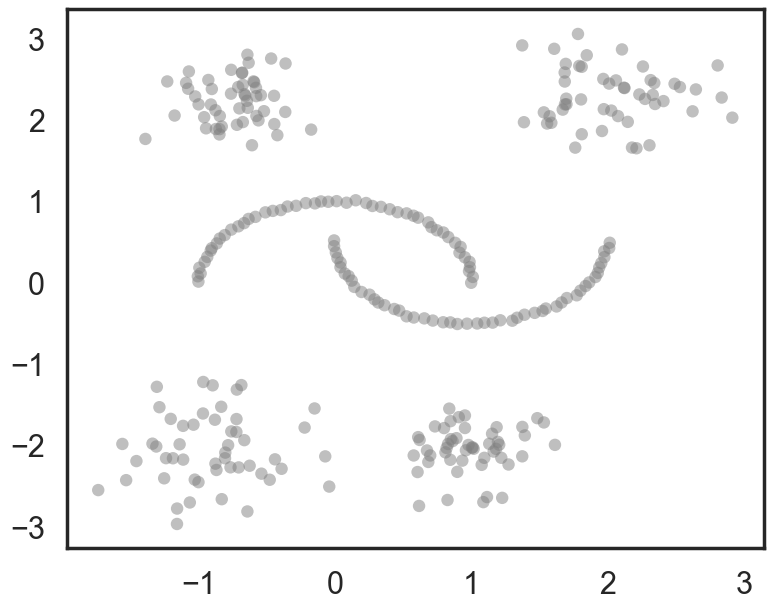

epsilon : 0.1, minPls : 15


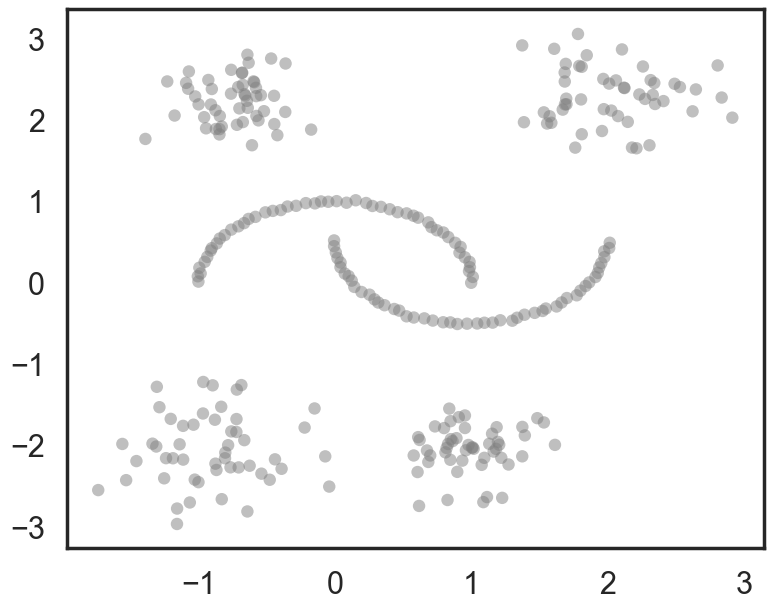

epsilon : 0.1, minPls : 20


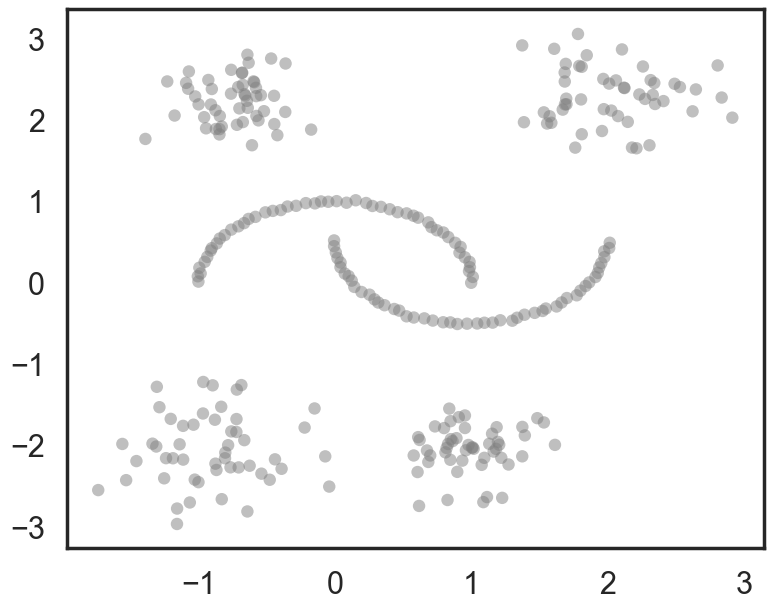

epsilon : 0.2, minPls : 5


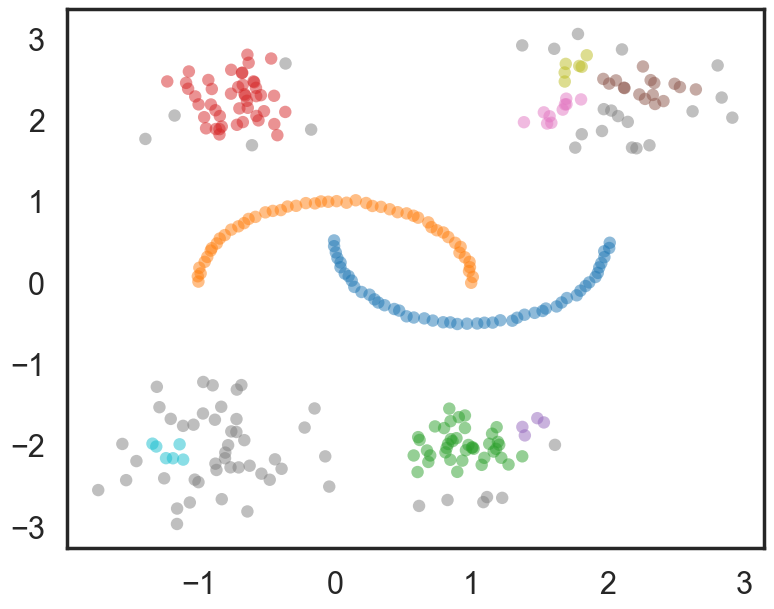

epsilon : 0.2, minPls : 10


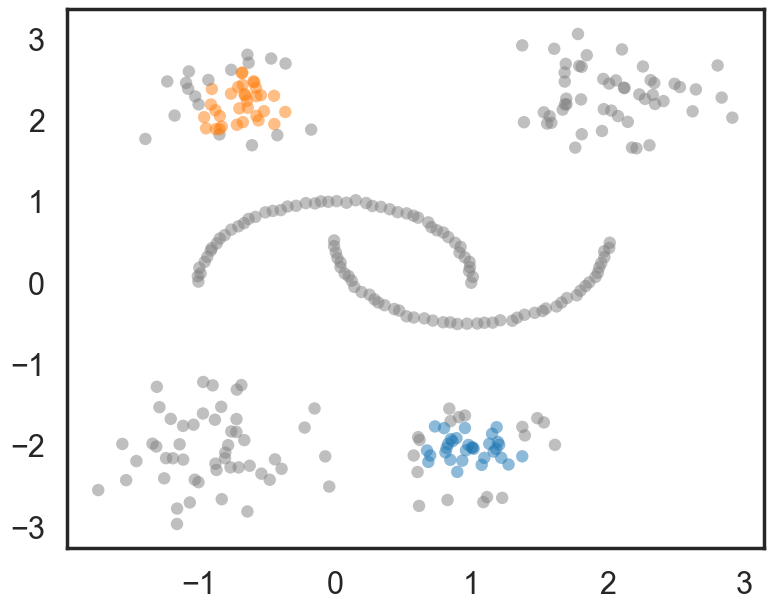

epsilon : 0.2, minPls : 15


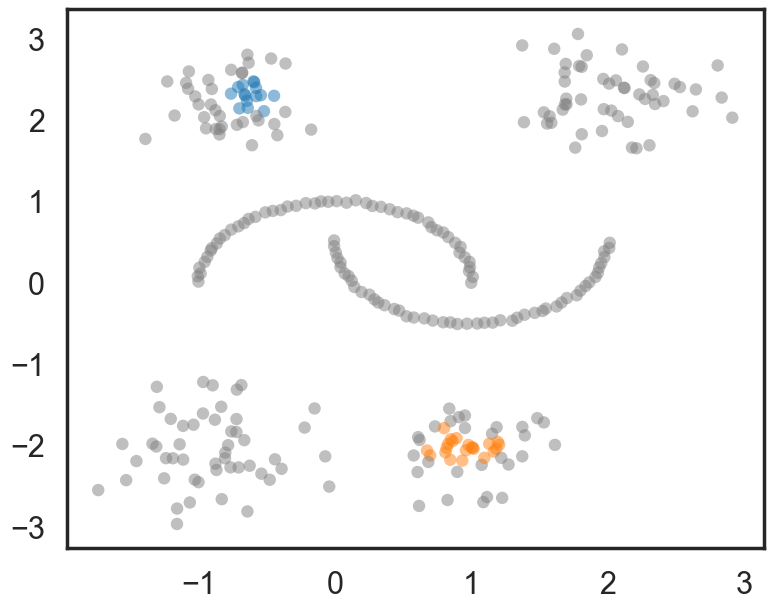

epsilon : 0.2, minPls : 20


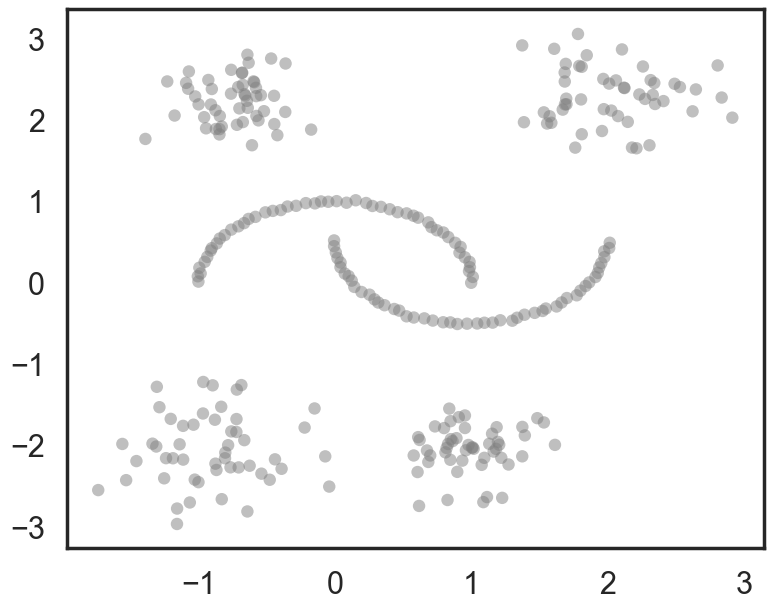

epsilon : 0.3, minPls : 5


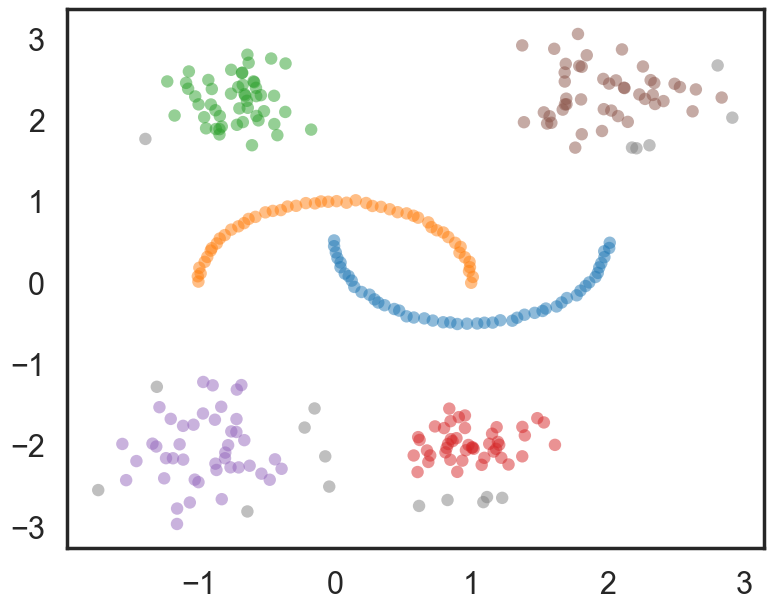

epsilon : 0.3, minPls : 10


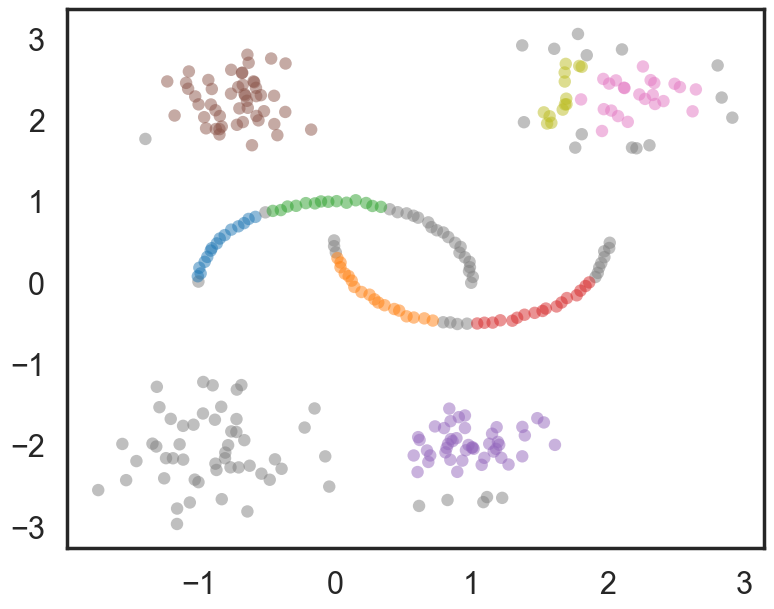

epsilon : 0.3, minPls : 15


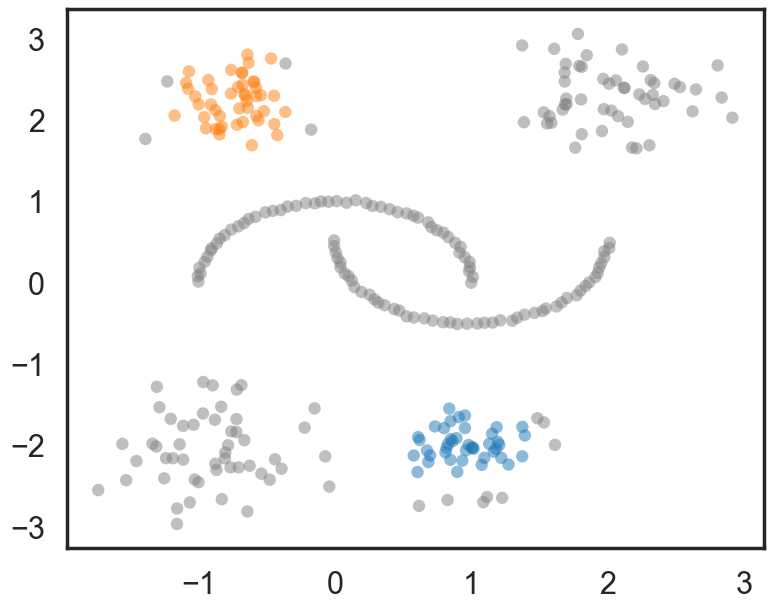

epsilon : 0.3, minPls : 20


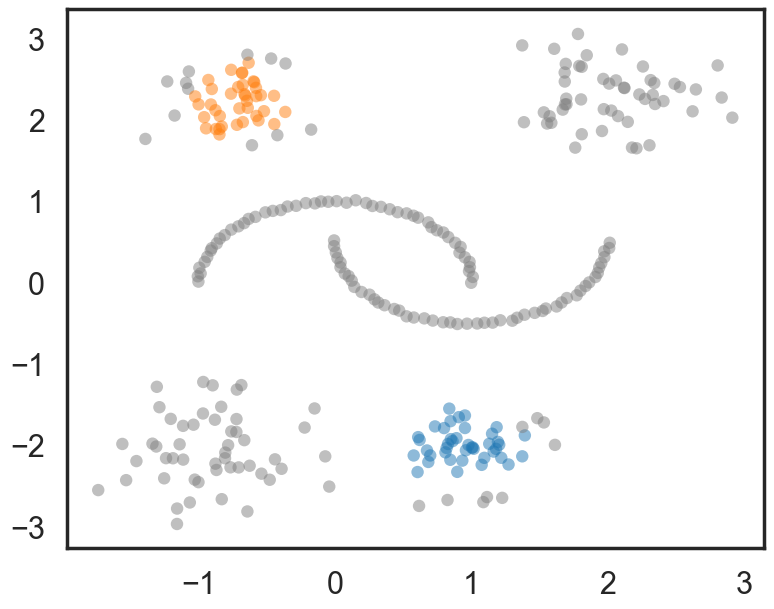

epsilon : 0.4, minPls : 5


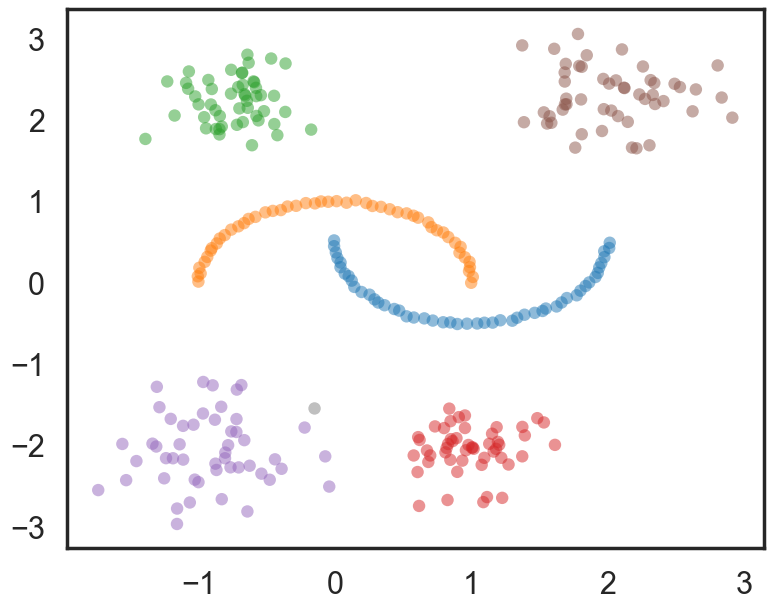

epsilon : 0.4, minPls : 10


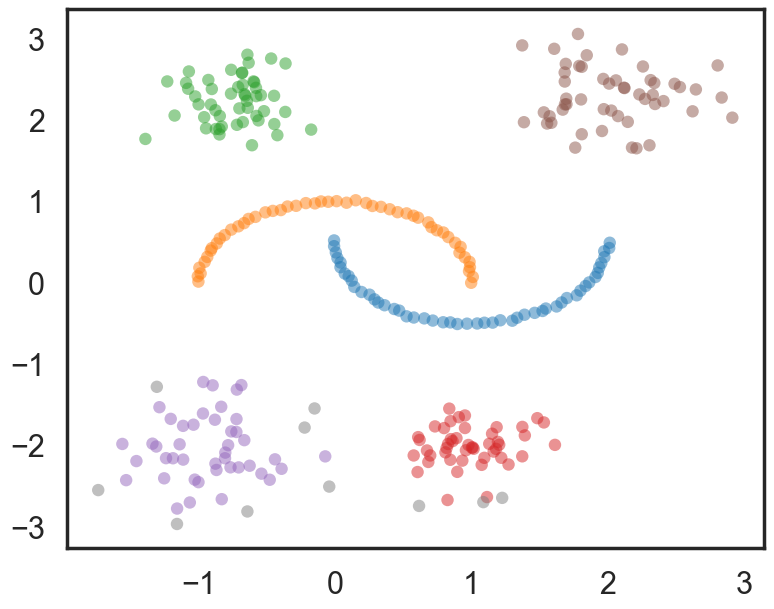

epsilon : 0.4, minPls : 15


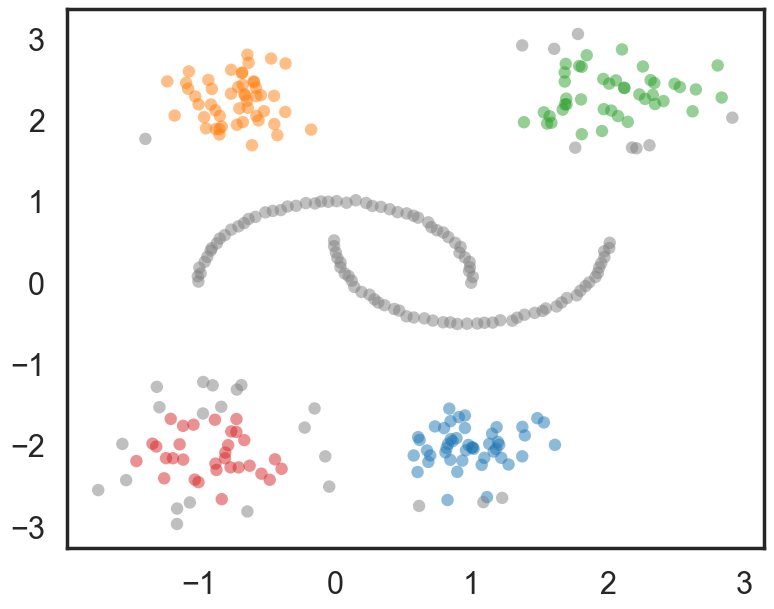

epsilon : 0.4, minPls : 20


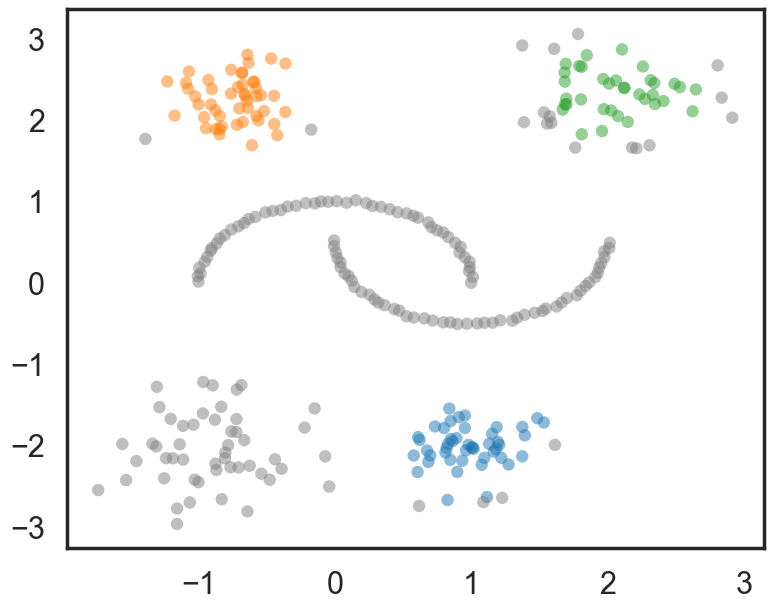

epsilon : 0.5, minPls : 5


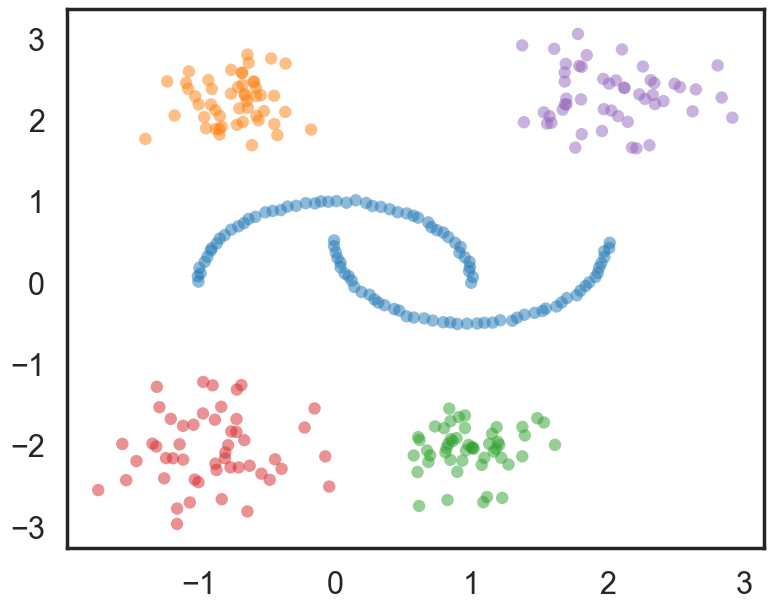

epsilon : 0.5, minPls : 10


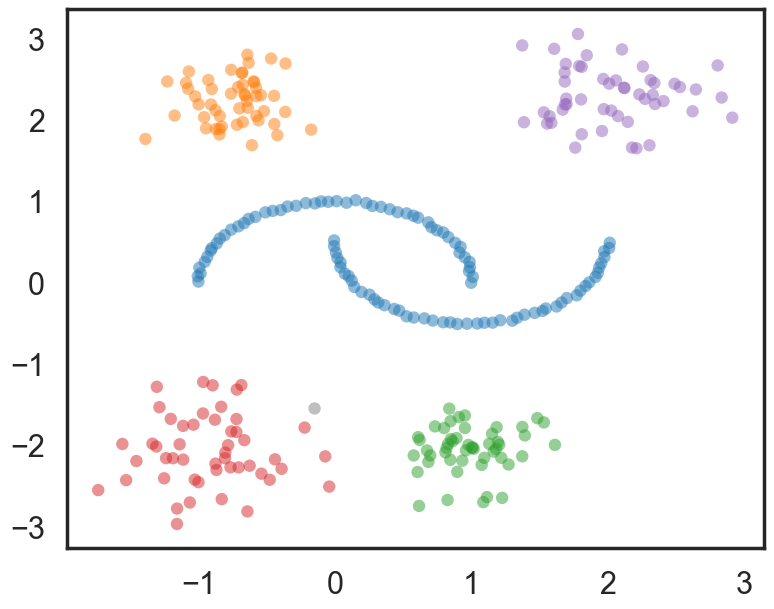

epsilon : 0.5, minPls : 15


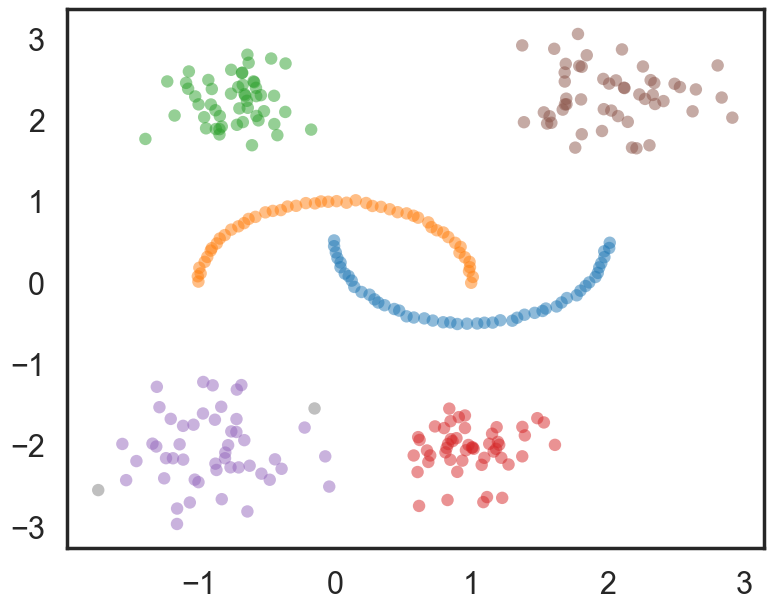

epsilon : 0.5, minPls : 20


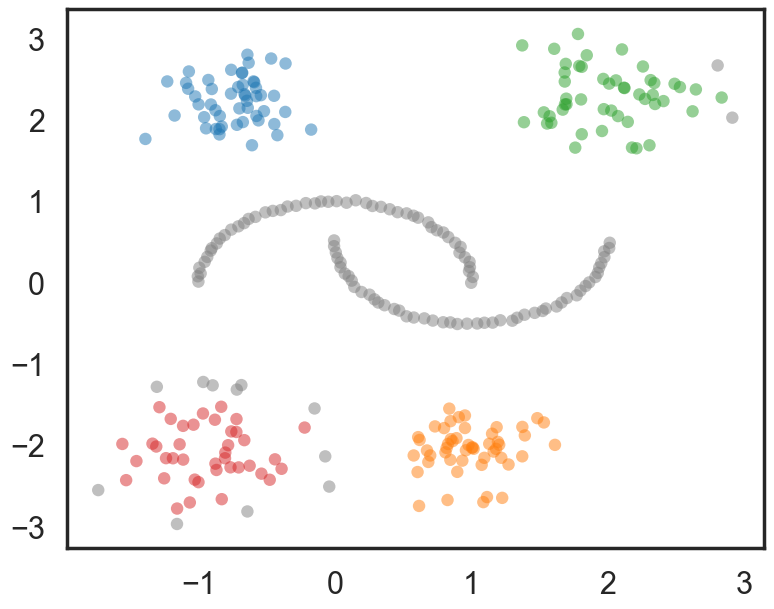

epsilon : 0.6, minPls : 5


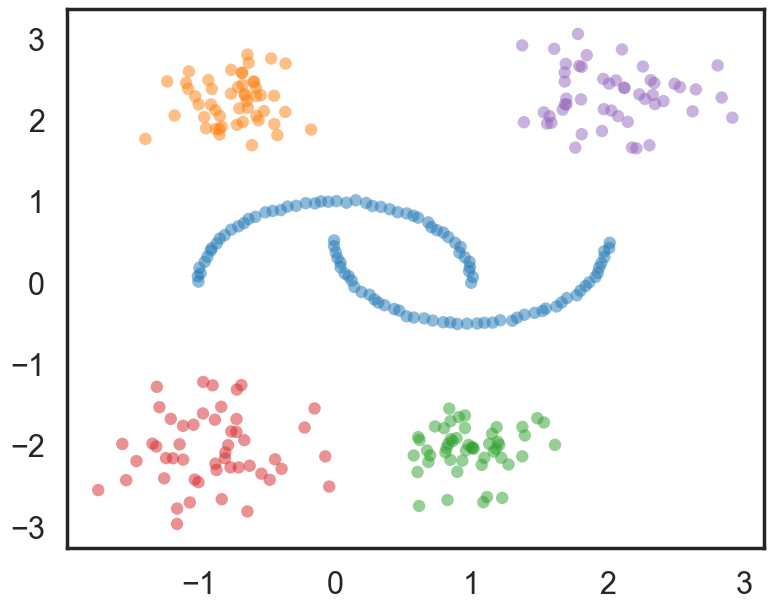

epsilon : 0.6, minPls : 10


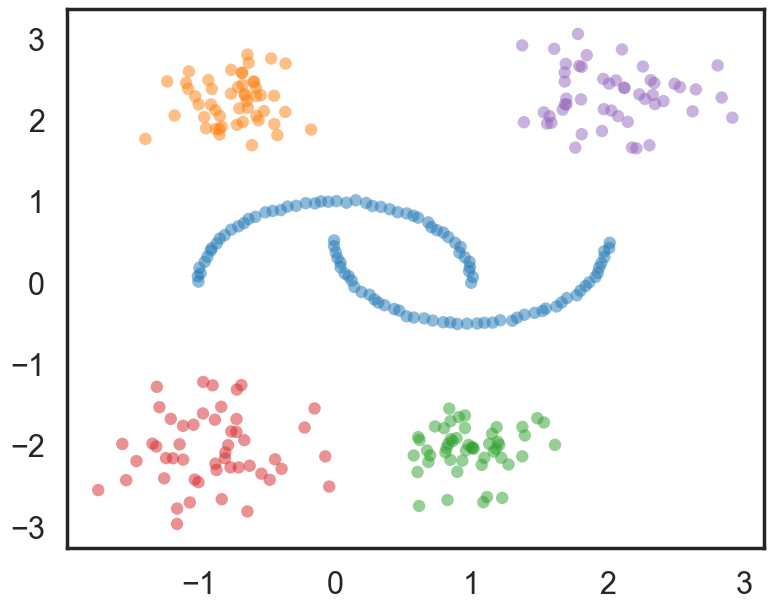

epsilon : 0.6, minPls : 15


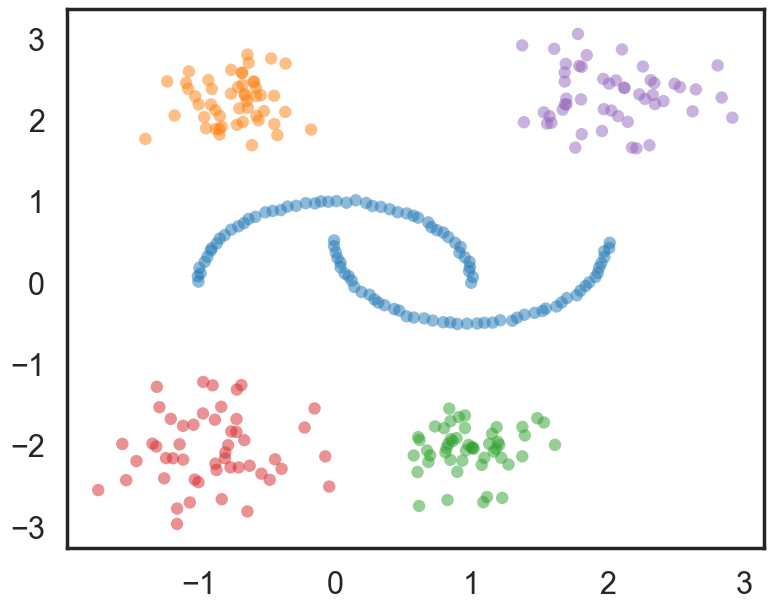

epsilon : 0.6, minPls : 20


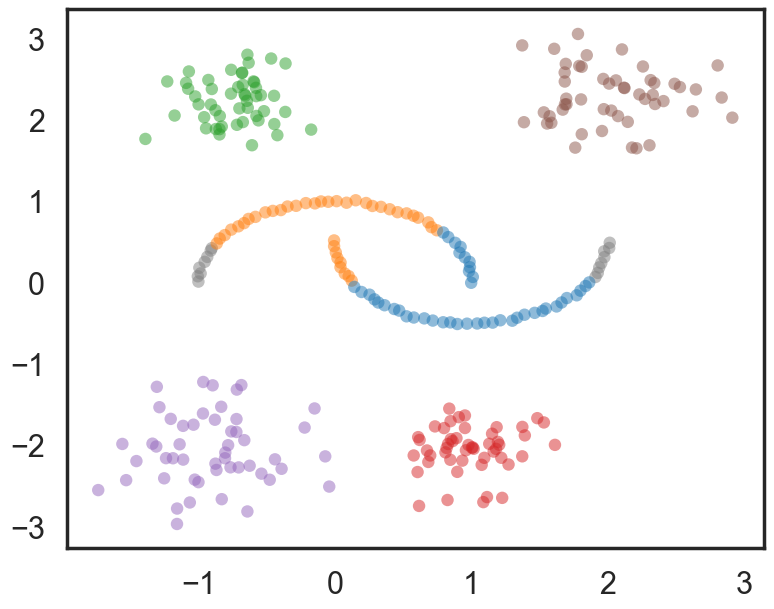

epsilon : 0.7, minPls : 5


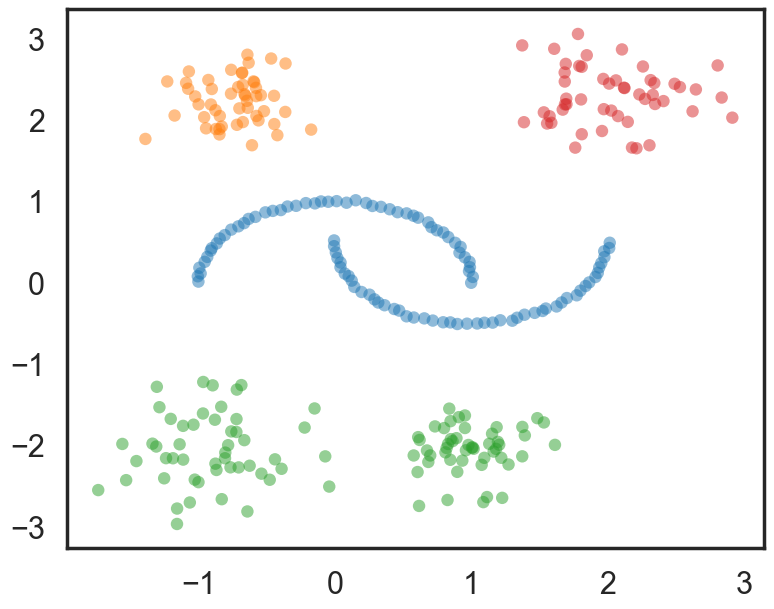

epsilon : 0.7, minPls : 10


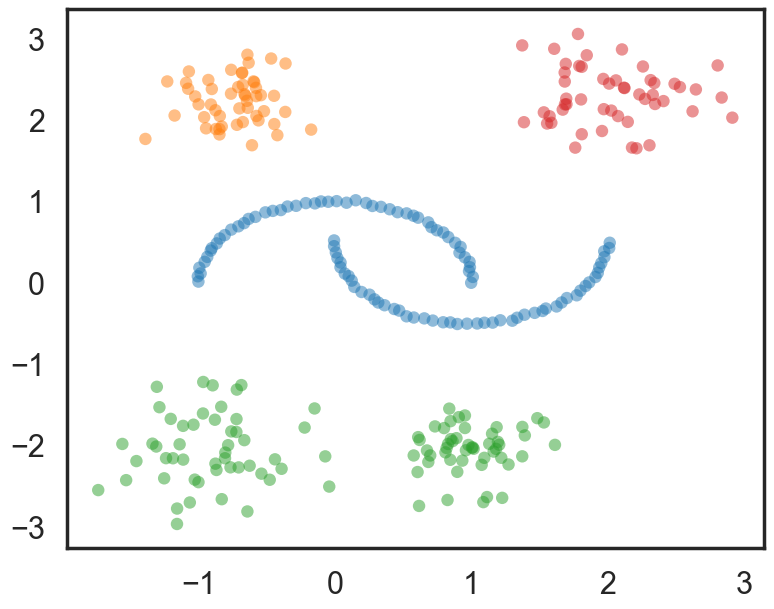

epsilon : 0.7, minPls : 15


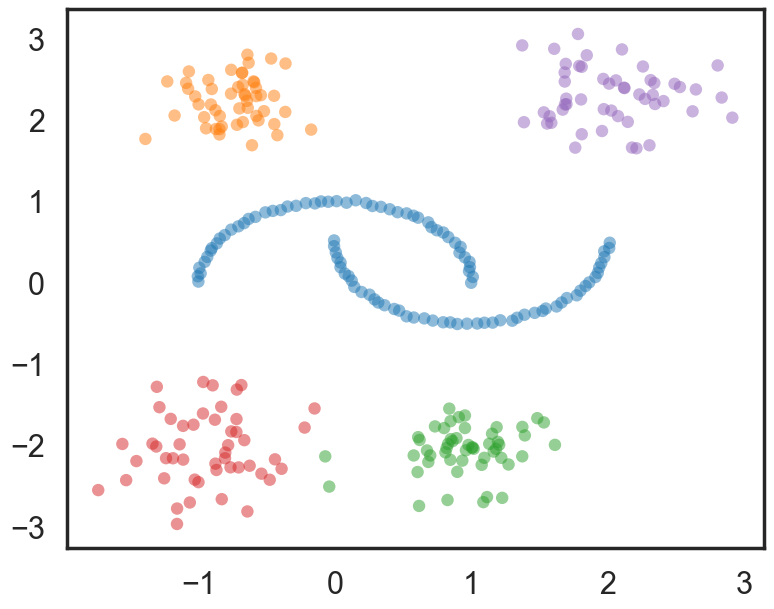

epsilon : 0.7, minPls : 20


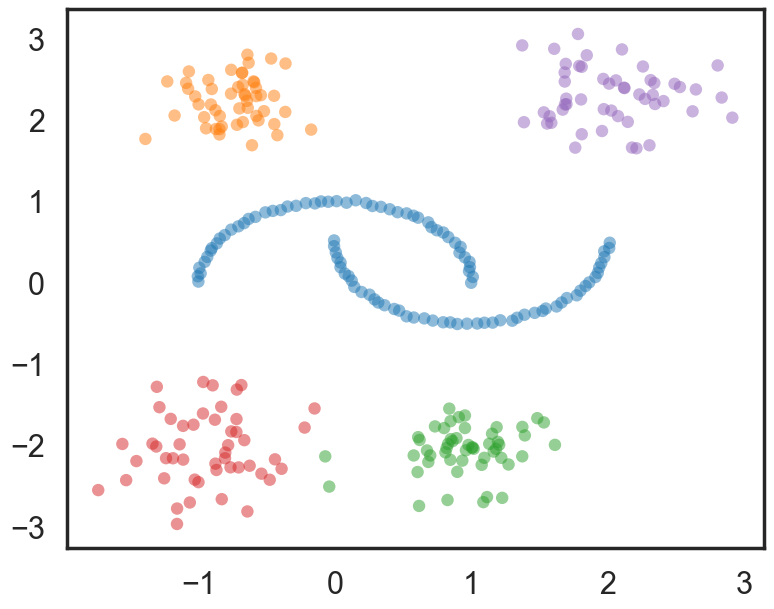

In [23]:
epsilon = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
minPls = [5, 10, 15, 20]

for e in epsilon:
    for m in minPls:
        print("epsilon : {}, minPls : {}".format(e, m))
        db = DBSCAN(eps=e, min_samples=m).fit(test_data)
        palette = sns.color_palette()
        cluster_colors = [palette[col]
                        if col >= 0 else (0.5, 0.5, 0.5) for col in
                        db.labels_]
        plt.scatter(test_data.T[0], test_data.T[1], c=cluster_colors, **plot_kwds)
        plt.show()